<a href="https://colab.research.google.com/github/rthjkvvn/Machine-Learning-Project/blob/main/Machine_Learning_(Supervised%26Unsupervised).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# DataSet Description


In [ ]:
#Reading data
data=pd.read_csv("/content/movie_ratings_dataset.csv") 

data.head()
data.columns


Index(['Genre', 'Director_Popularity', 'Budget_MillionUSD', 'Runtime_Minutes',
       'Release_Year', 'Num_Main_Actors', 'Avg_Actor_Popularity',
       'Has_Famous_Producer', 'Num_Awards_Won', 'Marketing_Spend_MillionUSD',
       'Is_Sequel', 'Rating_Category'],
      dtype='object')

In [ ]:
data.Rating_Category.head()

,Rating_Category
0,Excellent
1,Excellent
2,Excellent
3,Good
4,Excellent


In [ ]:
data

,Genre,Director_Popularity,Budget_MillionUSD,Runtime_Minutes,Release_Year,Num_Main_Actors,Avg_Actor_Popularity,Has_Famous_Producer,Num_Awards_Won,Marketing_Spend_MillionUSD,Is_Sequel,Rating_Category
0,Sci-Fi,5.80,134.63,141.0,NaN,1.0,2.72,No,9.0,25.48,No,Excellent
1,Action,2.27,220.47,98.0,2006.0,1.0,3.46,Yes,17.0,9.13,Yes,Excellent
2,Horror,1.23,52.79,160.0,2010.0,2.0,NaN,NaN,43.0,6.16,No,Excellent
3,Action,8.17,86.41,153.0,2022.0,4.0,5.21,NaN,7.0,2.99,No,Good
4,Romance,6.40,259.57,134.0,1986.0,1.0,8.72,Yes,25.0,0.89,No,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Drama,3.54,288.86,167.0,2016.0,3.0,6.35,Yes,46.0,17.66,NaN,Excellent
1196,Comedy,NaN,22.49,179.0,1990.0,4.0,8.95,Yes,17.0,10.54,NaN,Average
1197,Comedy,2.07,81.23,108.0,2023.0,2.0,9.20,No,46.0,38.61,No,Average
1198,Horror,7.80,24.98,139.0,2001.0,2.0,9.63,No,19.0,8.84,Yes,Poor


In [ ]:
data.shape

(1200, 12)

#Classification or Regression

In [ ]:
def is_classification_series(s: pd.Series) -> bool:
    if s.dtype == 'O' or str(s.dtype).startswith('category'):
        return True
    nunq = s.nunique(dropna=True)
    n = len(s)
    return nunq <= max(20, int(0.2*n))  # heuristic

IS_CLASSIFICATION = is_classification_series(data['Rating_Category'])
print("Detected task:", "Classification" if IS_CLASSIFICATION else "Regression")

Detected task: Classification


Data Points

In [ ]:
numerical_data = data.select_dtypes(include='number')

#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)




#Selecting categoricalfeatures
categorical_data=data.select_dtypes(include= 'object')

#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'\nThere are {len(categorical_features)-1} categorical features and Target variable:', '\n')
print(categorical_features)

num_cols = numerical_features
cat_cols = [col for col in categorical_features if col != 'Rating_Category']

There are 8 numerical features: 

['Director_Popularity', 'Budget_MillionUSD', 'Runtime_Minutes', 'Release_Year', 'Num_Main_Actors', 'Avg_Actor_Popularity', 'Num_Awards_Won', 'Marketing_Spend_MillionUSD']

There are 3 categorical features and Target variable: 

['Genre', 'Has_Famous_Producer', 'Is_Sequel', 'Rating_Category']


In [ ]:
TARGET_COL = 'Rating_Category'

Correlation

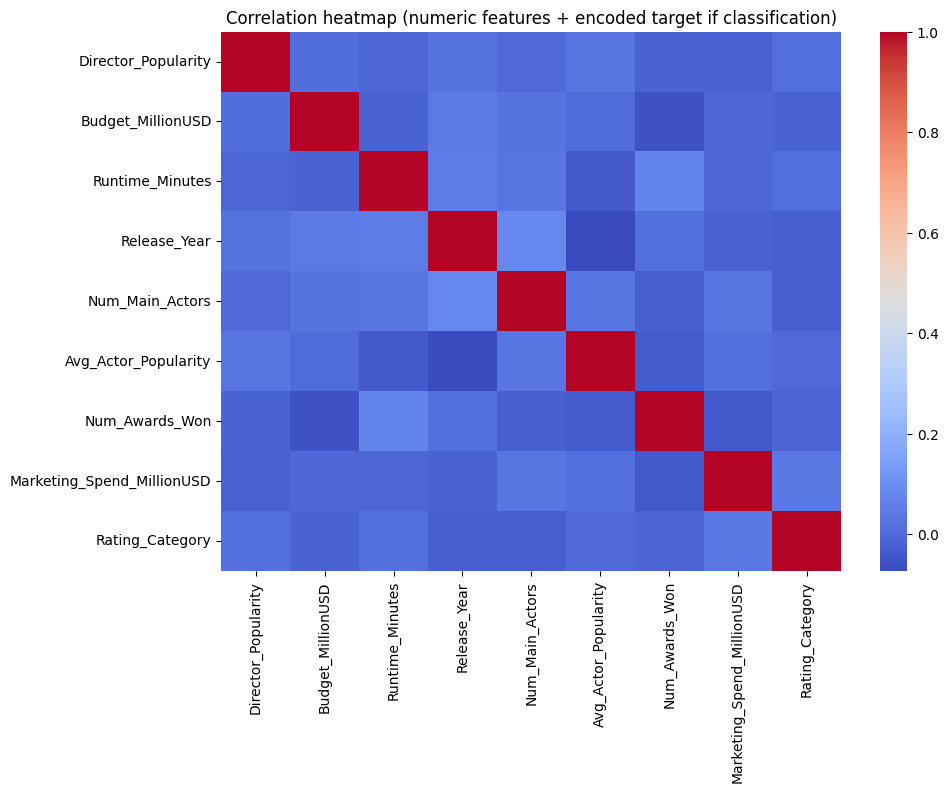

In [ ]:
from sklearn.preprocessing import LabelEncoder
data_corr = data.copy()


data_corr[TARGET_COL] = LabelEncoder().fit_transform(data_corr[TARGET_COL])

num_for_corr = data_corr.select_dtypes(include=[np.number])
if num_for_corr.shape[1] >= 2:
    plt.figure(figsize=(10,7))
    sns.heatmap(num_for_corr.corr(), cmap='coolwarm', annot=False)
    plt.title("Correlation heatmap (numeric features + encoded target if classification)")
    plt.show()
else:
    print("Not enough numeric columns for a heatmap.")

Matrix Correlation

In [ ]:
matrix_corr = num_for_corr.corr()
matrix_corr
#sns.heatmap(matrix_corr)

,Director_Popularity,Budget_MillionUSD,Runtime_Minutes,Release_Year,Num_Main_Actors,Avg_Actor_Popularity,Num_Awards_Won,Marketing_Spend_MillionUSD,Rating_Category
Director_Popularity,1.000000,0.008099,-0.008573,0.021481,-0.000977,0.031357,-0.016872,-0.019552,0.013430
Budget_MillionUSD,0.008099,1.000000,-0.015807,0.041227,0.025312,0.005023,-0.060052,-0.003116,-0.017971
Runtime_Minutes,-0.008573,-0.015807,1.000000,0.047818,0.030211,-0.037509,0.067939,-0.006489,0.013099
Release_Year,0.021481,0.041227,0.047818,1.000000,0.078513,-0.073009,0.015372,-0.016511,-0.024925
Num_Main_Actors,-0.000977,0.025312,0.030211,0.078513,1.000000,0.029174,-0.026058,0.027867,-0.031012
Avg_Actor_Popularity,0.031357,0.005023,-0.037509,-0.073009,0.029174,1.000000,-0.034692,0.019125,0.002386
Num_Awards_Won,-0.016872,-0.060052,0.067939,0.015372,-0.026058,-0.034692,1.000000,-0.042596,-0.011178
Marketing_Spend_MillionUSD,-0.019552,-0.003116,-0.006489,-0.016511,0.027867,0.019125,-0.042596,1.000000,0.038394
Rating_Category,0.013430,-0.017971,0.013099,-0.024925,-0.031012,0.002386,-0.011178,0.038394,1.000000


Number of Classes

In [ ]:
count = data['Rating_Category']
print(count.value_counts())

Rating_Category
Good         324
Excellent    304
Average      294
Poor         278
Name: count, dtype: int64


Bar Chart of Classes

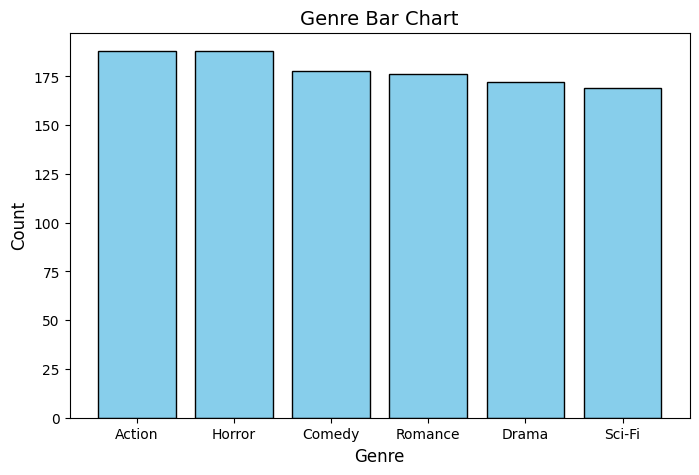

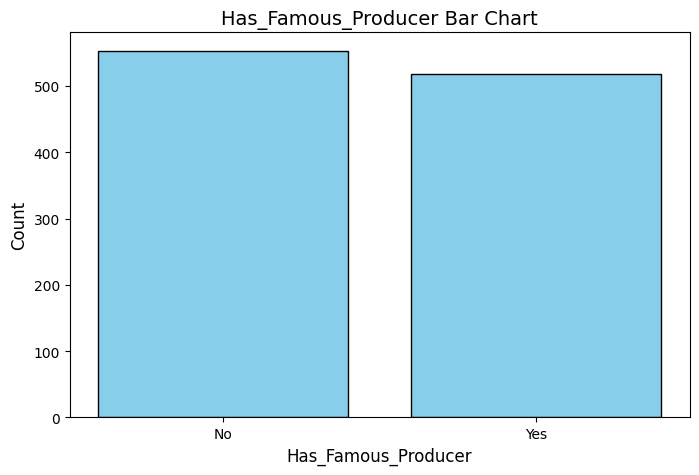

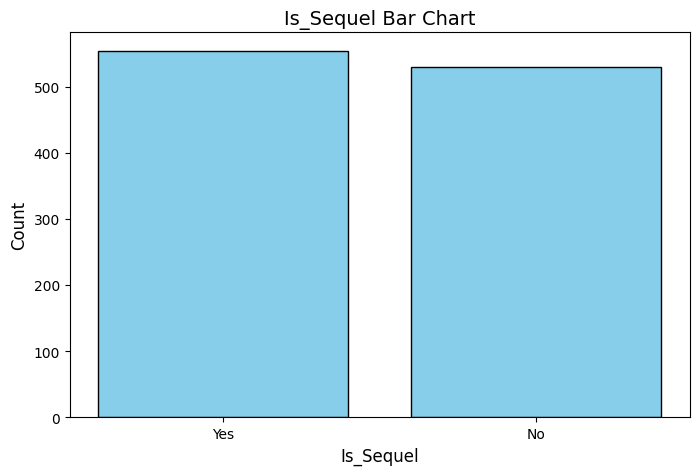

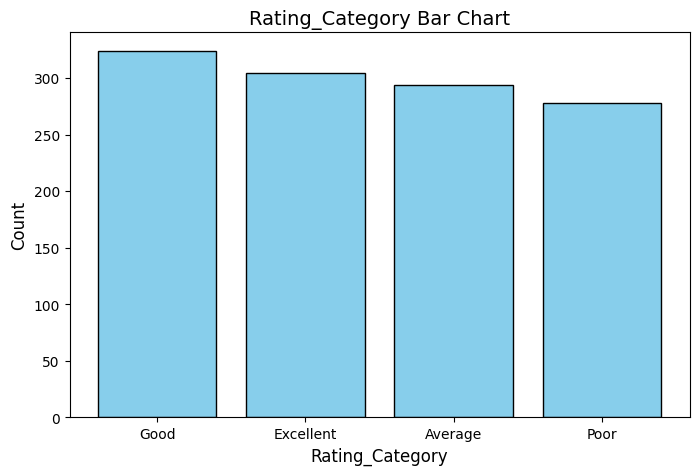

In [ ]:
import matplotlib.pyplot as plt

# Count how many samples are in each class
for i in categorical_features:

    class_counts = data[i].value_counts()


    plt.figure(figsize=(8,5))

    plt.bar(class_counts.index,class_counts.values,color='skyblue',edgecolor='black')

    plt.title(f"{i} Bar Chart", fontsize=14)
    plt.xlabel(f"{i}", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=0)
    plt.show()


#**EDA**

Describe

In [ ]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Director_Popularity,1067.0,5.452624,2.600397,1.01,3.3100,5.40,7.6900,10.00
Budget_MillionUSD,1096.0,152.768723,85.998943,1.04,78.8575,156.06,226.0175,299.73
Runtime_Minutes,1074.0,129.401304,28.744659,80.00,103.0000,130.00,154.0000,179.00
Release_Year,1088.0,2002.330882,13.068670,1980.00,1991.0000,2002.00,2014.0000,2024.00
Num_Main_Actors,1075.0,2.531163,1.143236,1.00,1.0000,3.00,4.0000,4.00
Avg_Actor_Popularity,1066.0,5.495159,2.620555,1.00,3.2300,5.47,7.8200,10.00
Num_Awards_Won,1061.0,24.113101,14.464153,0.00,12.0000,24.00,37.0000,49.00
Marketing_Spend_MillionUSD,1089.0,24.351947,14.648245,0.00,11.1300,24.43,37.1600,49.98


In [ ]:
categorical_data.describe().T

,count,unique,top,freq
Genre,1071,6,Action,188
Has_Famous_Producer,1071,2,No,553
Is_Sequel,1083,2,Yes,554
Rating_Category,1200,4,Good,324


In [ ]:
numerical_data.skew()

,0
Director_Popularity,0.022995
Budget_MillionUSD,-0.066930
Runtime_Minutes,-0.008828
Release_Year,-0.015865
Num_Main_Actors,-0.024278
Avg_Actor_Popularity,-0.005551
Num_Awards_Won,0.065543
Marketing_Spend_MillionUSD,0.041577


Missing Values


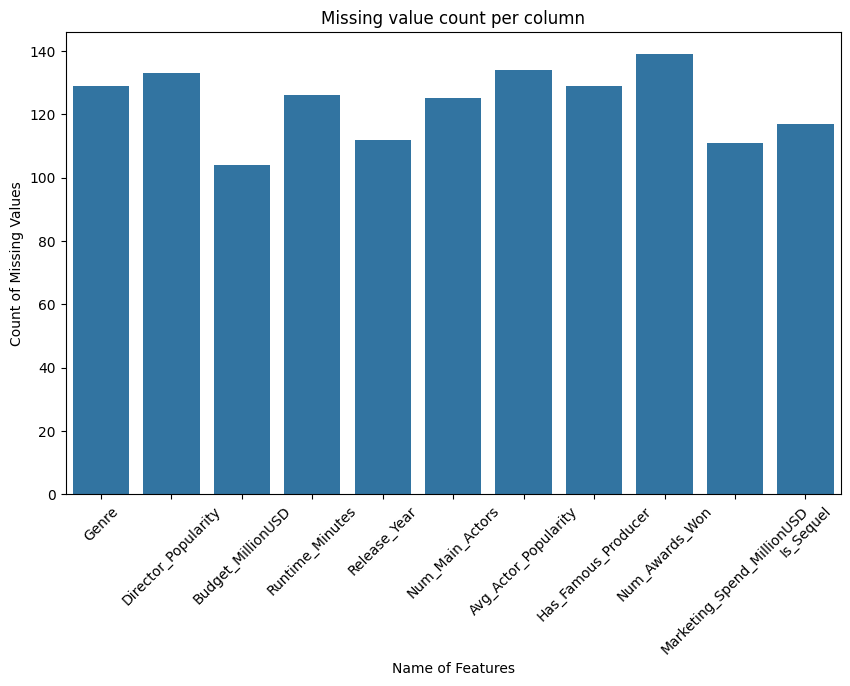

In [ ]:
missing = data.isnull().sum()
missing = missing[missing > 0]
plt.figure(figsize=(10,6))
sns.barplot(x=missing.index, y=missing.values)
plt.xlabel('Name of Features')
plt.ylabel("Count of Missing Values")
plt.title("Missing value count per column")
plt.xticks(rotation=45)
plt.show()

Histogram of Numerical Features

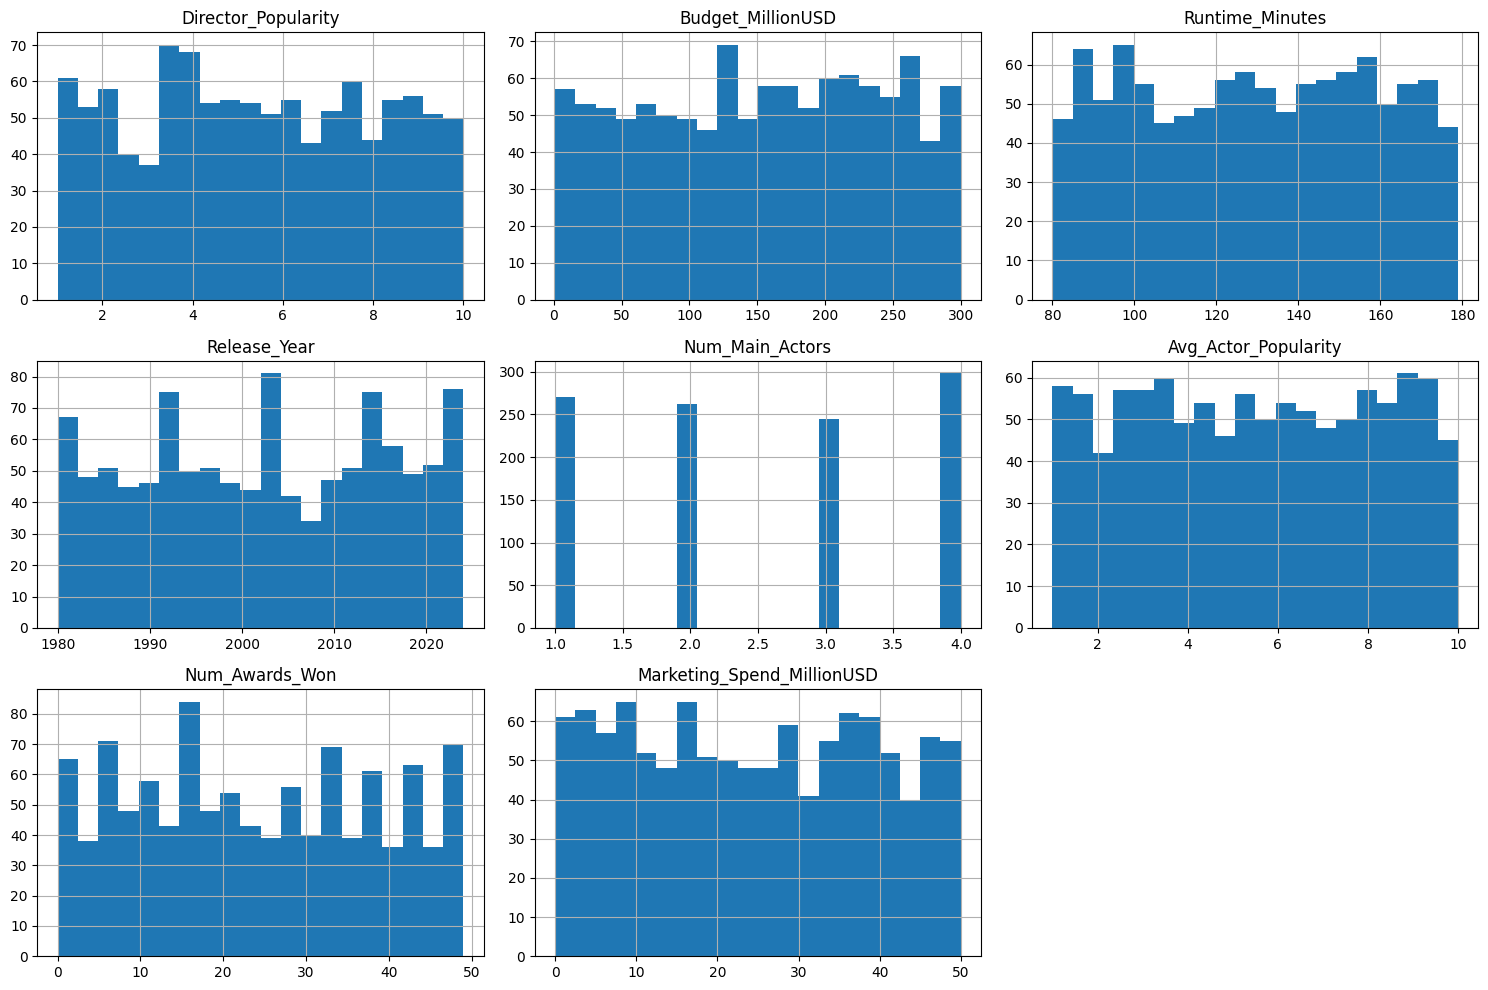

In [ ]:
num_features = data.select_dtypes(include=[np.number]).columns
data[num_features].hist(figsize=(15,10), bins=20)
plt.tight_layout()
plt.show()


#BoxPlot

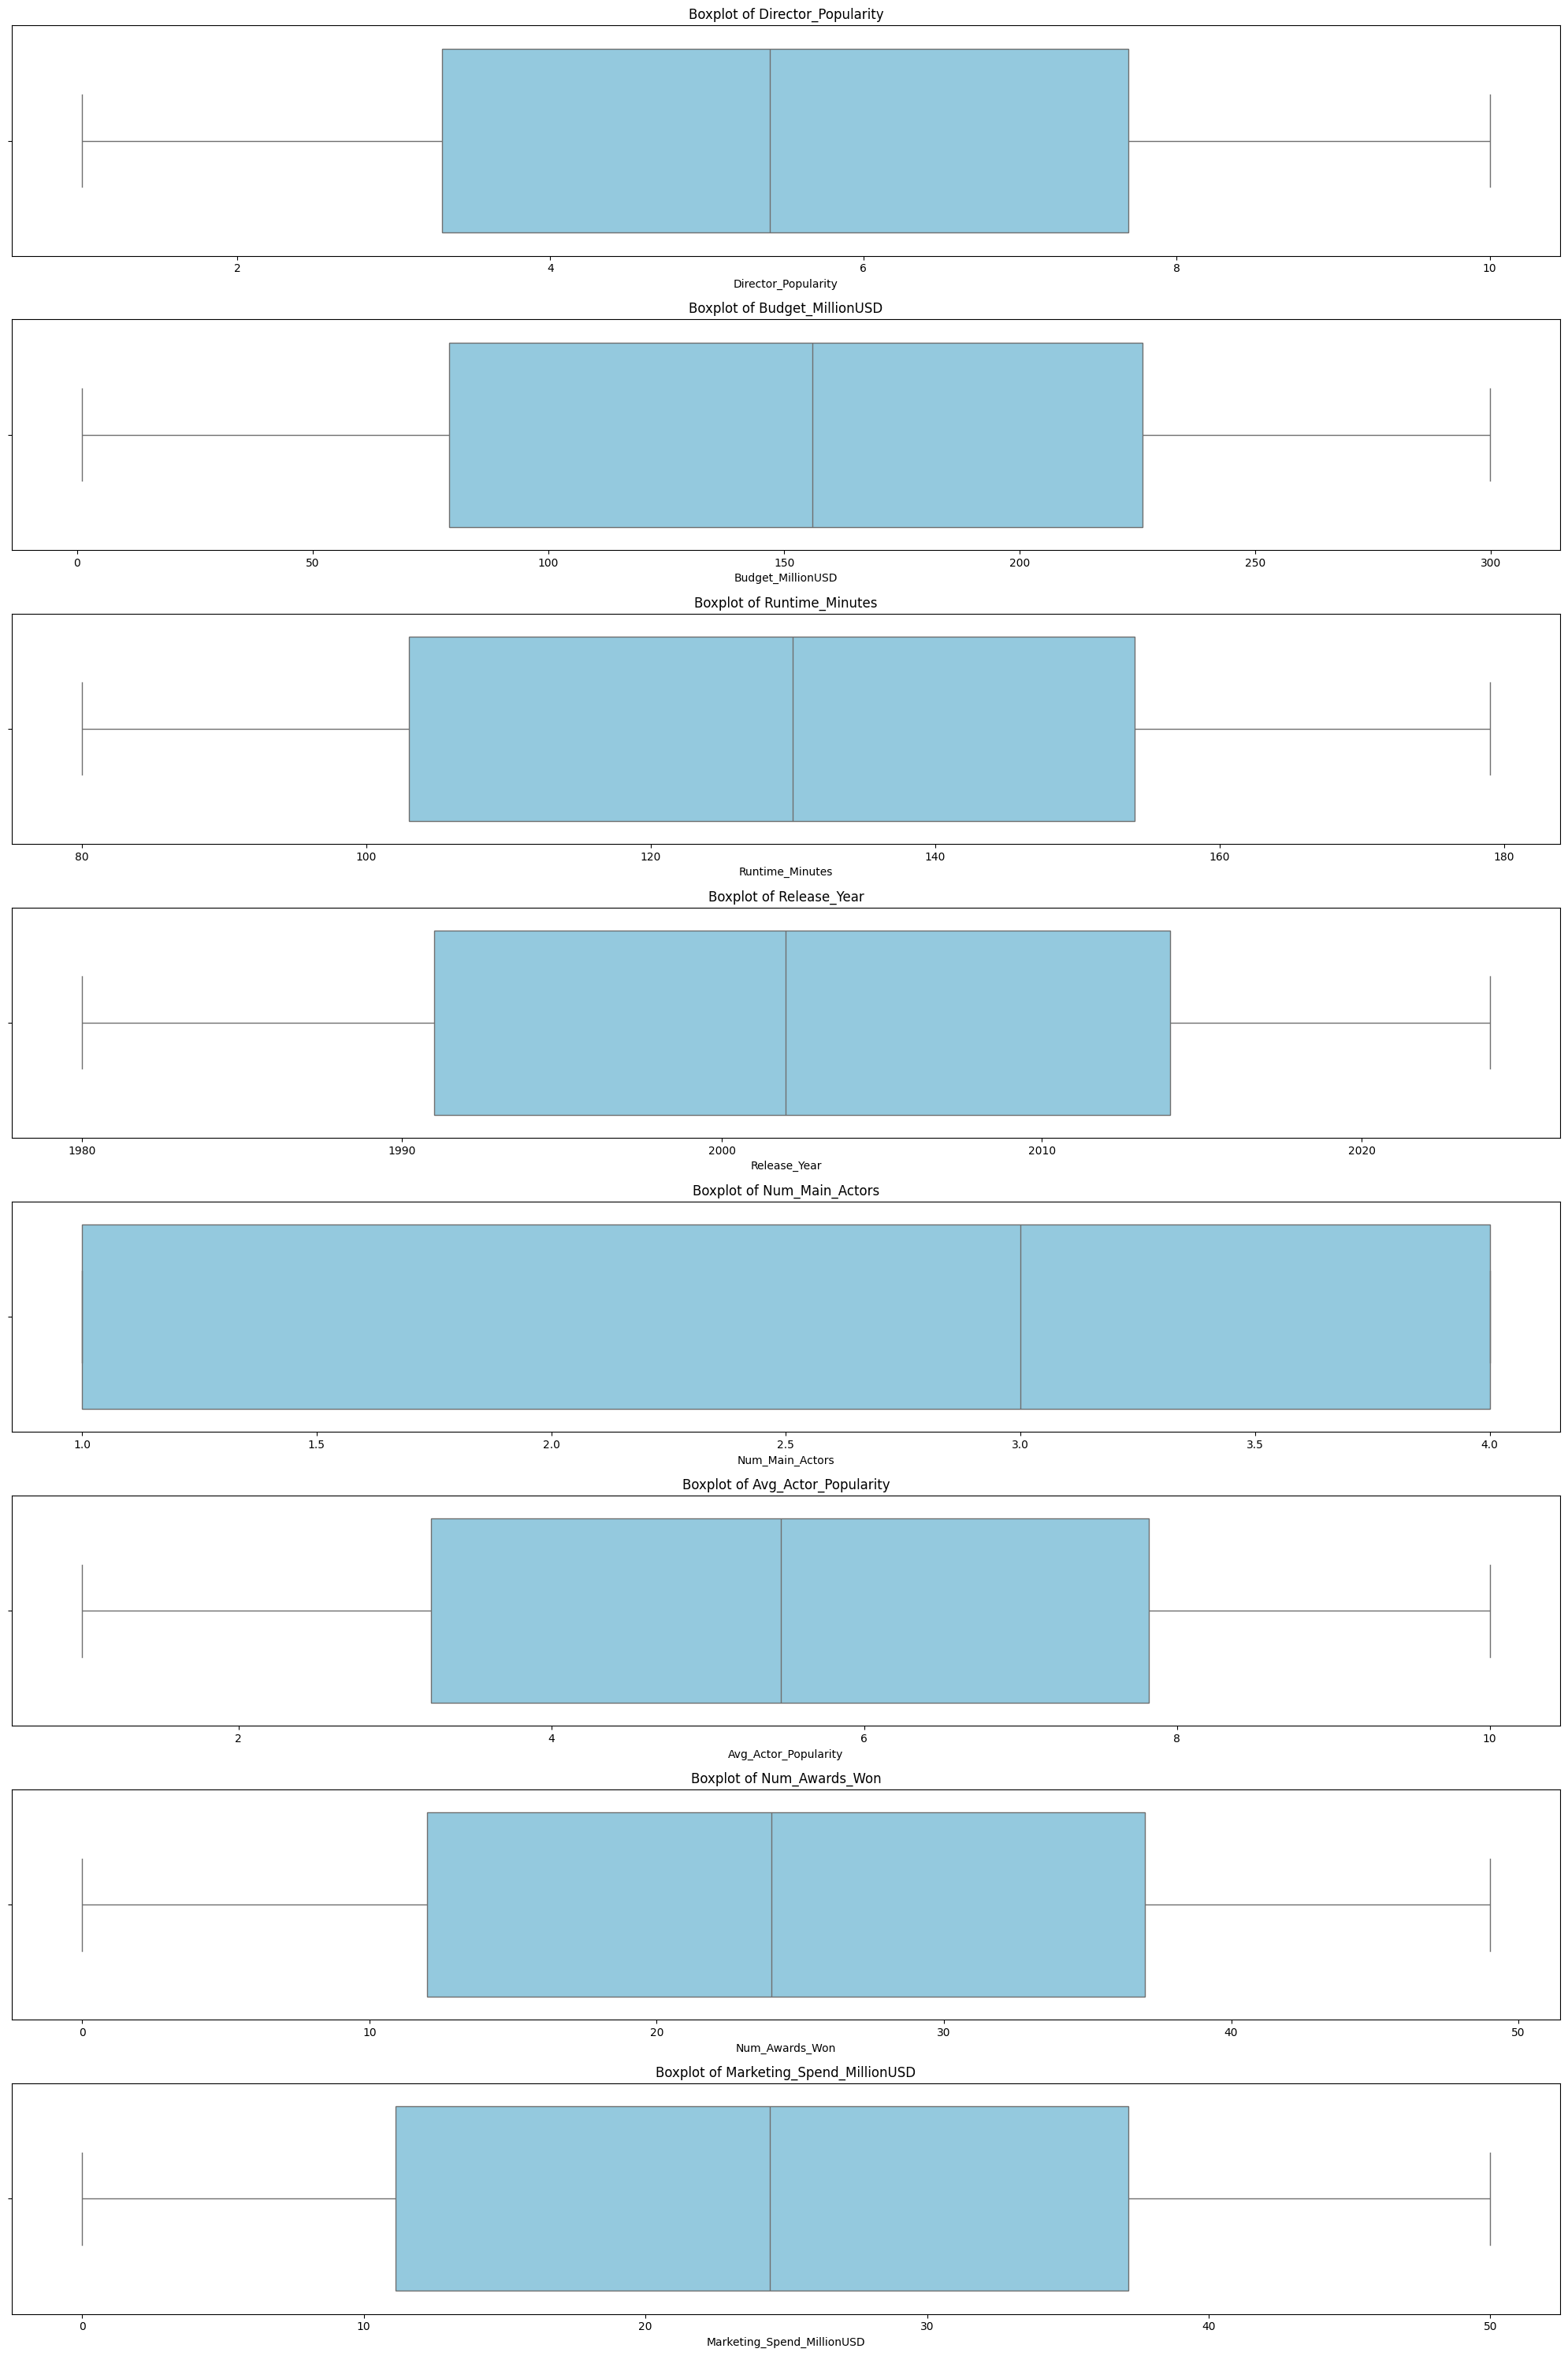

In [ ]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Set up the figure
plt.figure(figsize=(20, 30))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()

plt.show()

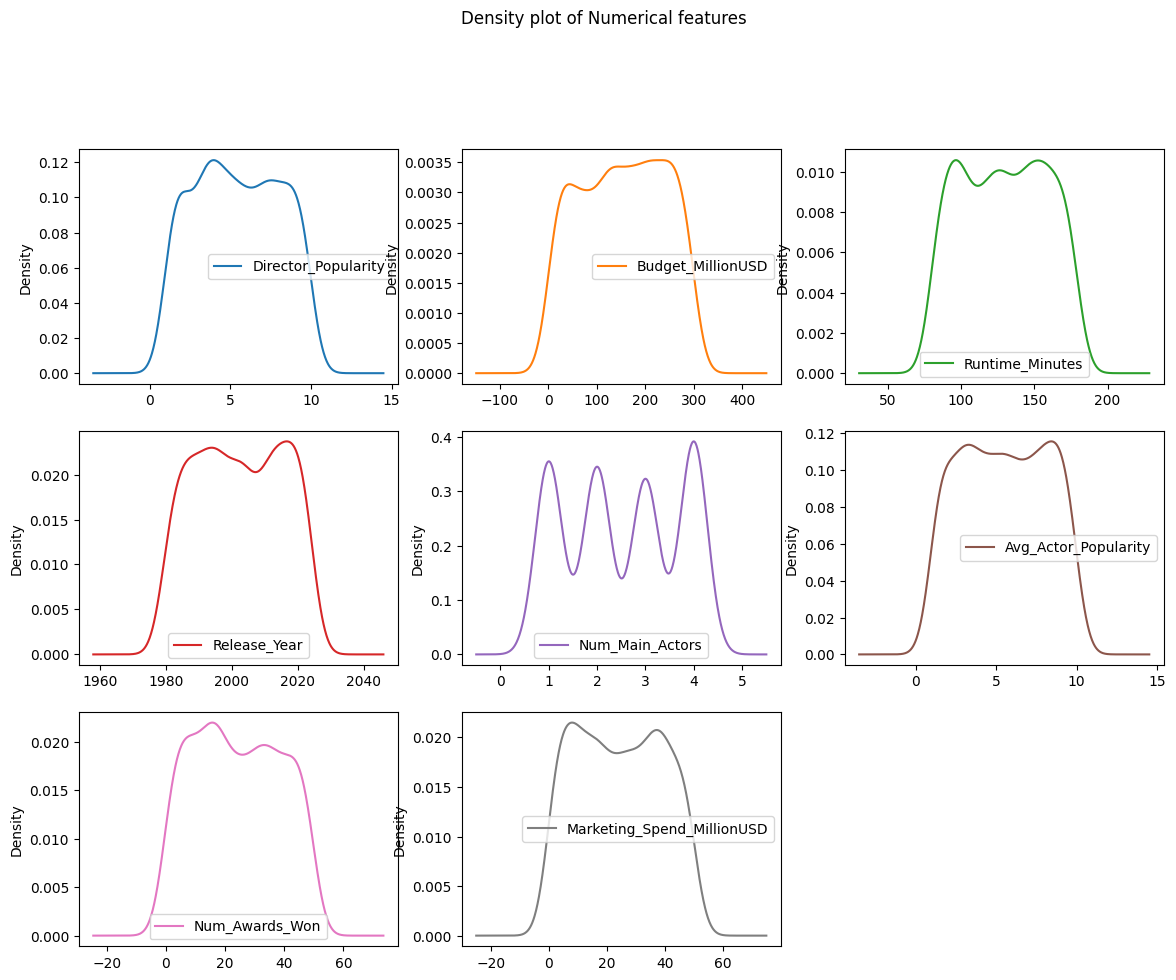

In [ ]:


numerical_data.plot(kind='density',figsize=(14, 14),subplots=True,layout=(4, 3),  title="Density plot of Numerical features",sharex=False)  # Keeps the x-axis independent for each subplot


plt.show()

#Pearson Method

Text(0.5, 1.0, 'Pearson Method')

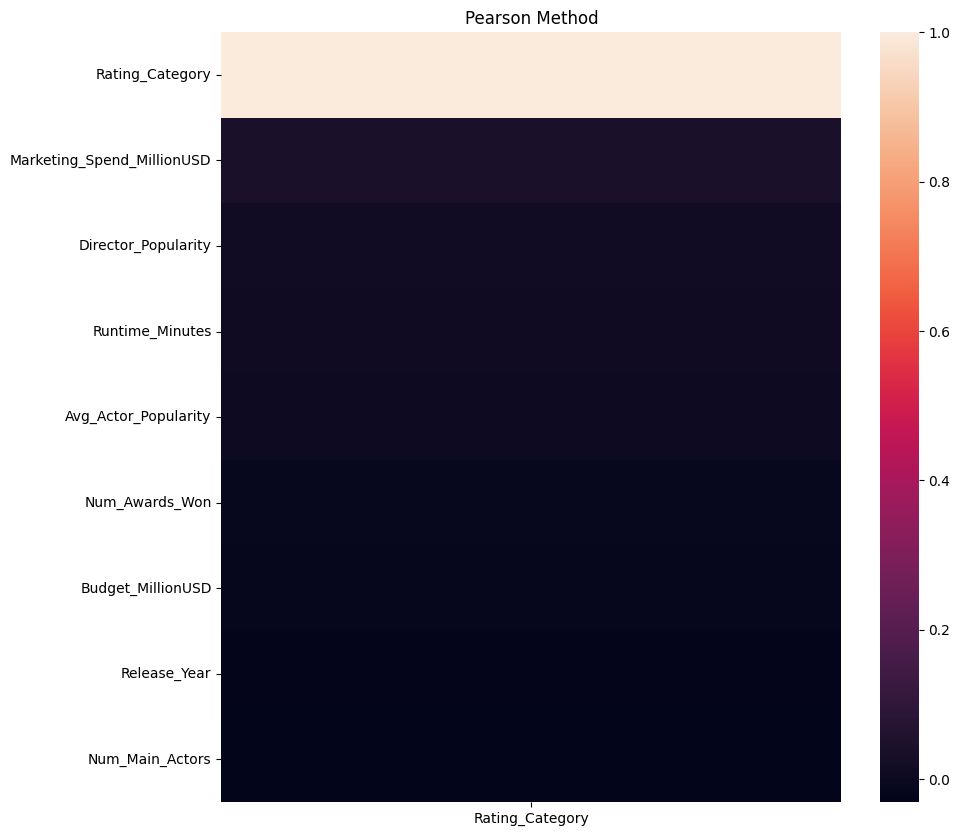

In [ ]:
plt.figure(figsize=(10,10))
## Correlation coefficient using Pearson

temp = numerical_data.copy()
temp["Rating_Category"] = data["Rating_Category"].astype("category").cat.codes

corr1 = temp.corr('pearson')[['Rating_Category']].sort_values(by='Rating_Category', ascending=False)
sns.heatmap(corr1)
plt.title('Pearson Method')


# Dropping Null values


In [ ]:
data.isnull().sum()

,0
Genre,129
Director_Popularity,133
Budget_MillionUSD,104
Runtime_Minutes,126
Release_Year,112
Num_Main_Actors,125
Avg_Actor_Popularity,134
Has_Famous_Producer,129
Num_Awards_Won,139
Marketing_Spend_MillionUSD,111


In [ ]:
data=data.dropna(axis=0, subset='Genre')
data.head()

,Genre,Director_Popularity,Budget_MillionUSD,Runtime_Minutes,Release_Year,Num_Main_Actors,Avg_Actor_Popularity,Has_Famous_Producer,Num_Awards_Won,Marketing_Spend_MillionUSD,Is_Sequel,Rating_Category
0,Sci-Fi,5.80,134.63,141.0,NaN,1.0,2.72,No,9.0,25.48,No,Excellent
1,Action,2.27,220.47,98.0,2006.0,1.0,3.46,Yes,17.0,9.13,Yes,Excellent
2,Horror,1.23,52.79,160.0,2010.0,2.0,NaN,NaN,43.0,6.16,No,Excellent
3,Action,8.17,86.41,153.0,2022.0,4.0,5.21,NaN,7.0,2.99,No,Good
4,Romance,6.40,259.57,134.0,1986.0,1.0,8.72,Yes,25.0,0.89,No,Excellent


In [ ]:
numerical_data.var()

,0
Director_Popularity,6.762066
Budget_MillionUSD,7395.818247
Runtime_Minutes,826.255394
Release_Year,170.790140
Num_Main_Actors,1.306989
Avg_Actor_Popularity,6.867307
Num_Awards_Won,209.211724
Marketing_Spend_MillionUSD,214.571091


In [ ]:
data.shape

(1071, 12)

## #Category

In [ ]:
data['Is_Sequel'].unique()

array(['No', 'Yes', nan], dtype=object)

#Filling Null Values


In [ ]:
data['Is_Sequel'].fillna(data['Is_Sequel'].mode()[0], inplace=True)

print('After doing mode on is_sequel:')

data

After doing mode on is_sequel:


/tmp/ipython-input-3175765626.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Is_Sequel'].fillna(data['Is_Sequel'].mode()[0], inplace=True)
/tmp/ipython-input-3175765626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Is_Sequel'].fillna(data['Is_Sequel'].mode()[0], inplace=True)


,Genre,Director_Popularity,Budget_MillionUSD,Runtime_Minutes,Release_Year,Num_Main_Actors,Avg_Actor_Popularity,Has_Famous_Producer,Num_Awards_Won,Marketing_Spend_MillionUSD,Is_Sequel,Rating_Category
0,Sci-Fi,5.80,134.63,141.0,NaN,1.0,2.72,No,9.0,25.48,No,Excellent
1,Action,2.27,220.47,98.0,2006.0,1.0,3.46,Yes,17.0,9.13,Yes,Excellent
2,Horror,1.23,52.79,160.0,2010.0,2.0,NaN,NaN,43.0,6.16,No,Excellent
3,Action,8.17,86.41,153.0,2022.0,4.0,5.21,NaN,7.0,2.99,No,Good
4,Romance,6.40,259.57,134.0,1986.0,1.0,8.72,Yes,25.0,0.89,No,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Drama,3.54,288.86,167.0,2016.0,3.0,6.35,Yes,46.0,17.66,Yes,Excellent
1196,Comedy,NaN,22.49,179.0,1990.0,4.0,8.95,Yes,17.0,10.54,Yes,Average
1197,Comedy,2.07,81.23,108.0,2023.0,2.0,9.20,No,46.0,38.61,No,Average
1198,Horror,7.80,24.98,139.0,2001.0,2.0,9.63,No,19.0,8.84,Yes,Poor


In [ ]:
data['Has_Famous_Producer'] = data['Has_Famous_Producer'].fillna(data['Has_Famous_Producer'].mode()[0])

print('After doing mode on has_famous_producer: ')

data.isnull().sum()


After doing mode on has_famous_producer: 


/tmp/ipython-input-3589138933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Has_Famous_Producer'] = data['Has_Famous_Producer'].fillna(data['Has_Famous_Producer'].mode()[0])


,0
Genre,0
Director_Popularity,115
Budget_MillionUSD,99
Runtime_Minutes,111
Release_Year,102
Num_Main_Actors,107
Avg_Actor_Popularity,117
Has_Famous_Producer,0
Num_Awards_Won,125
Marketing_Spend_MillionUSD,98


In [ ]:
data['Director_Popularity']=data['Director_Popularity'].fillna(data['Director_Popularity'].mean())

data

/tmp/ipython-input-1419968159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Director_Popularity']=data['Director_Popularity'].fillna(data['Director_Popularity'].mean())


,Genre,Director_Popularity,Budget_MillionUSD,Runtime_Minutes,Release_Year,Num_Main_Actors,Avg_Actor_Popularity,Has_Famous_Producer,Num_Awards_Won,Marketing_Spend_MillionUSD,Is_Sequel,Rating_Category
0,Sci-Fi,5.800000,134.63,141.0,NaN,1.0,2.72,No,9.0,25.48,No,Excellent
1,Action,2.270000,220.47,98.0,2006.0,1.0,3.46,Yes,17.0,9.13,Yes,Excellent
2,Horror,1.230000,52.79,160.0,2010.0,2.0,NaN,No,43.0,6.16,No,Excellent
3,Action,8.170000,86.41,153.0,2022.0,4.0,5.21,No,7.0,2.99,No,Good
4,Romance,6.400000,259.57,134.0,1986.0,1.0,8.72,Yes,25.0,0.89,No,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Drama,3.540000,288.86,167.0,2016.0,3.0,6.35,Yes,46.0,17.66,Yes,Excellent
1196,Comedy,5.439163,22.49,179.0,1990.0,4.0,8.95,Yes,17.0,10.54,Yes,Average
1197,Comedy,2.070000,81.23,108.0,2023.0,2.0,9.20,No,46.0,38.61,No,Average
1198,Horror,7.800000,24.98,139.0,2001.0,2.0,9.63,No,19.0,8.84,Yes,Poor


In [ ]:
from sklearn.impute import SimpleImputer

impute=SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(data[['Budget_MillionUSD']])

data['Budget_MillionUSD']=impute.transform(data[['Budget_MillionUSD']])

data

/tmp/ipython-input-2971152963.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Budget_MillionUSD']=impute.transform(data[['Budget_MillionUSD']])


,Genre,Director_Popularity,Budget_MillionUSD,Runtime_Minutes,Release_Year,Num_Main_Actors,Avg_Actor_Popularity,Has_Famous_Producer,Num_Awards_Won,Marketing_Spend_MillionUSD,Is_Sequel,Rating_Category
0,Sci-Fi,5.800000,134.630000,141.0,NaN,1.0,2.72,No,9.0,25.48,No,Excellent
1,Action,2.270000,220.470000,98.0,2006.0,1.0,3.46,Yes,17.0,9.13,Yes,Excellent
2,Horror,1.230000,52.790000,160.0,2010.0,2.0,NaN,No,43.0,6.16,No,Excellent
3,Action,8.170000,86.410000,153.0,2022.0,4.0,5.21,No,7.0,2.99,No,Good
4,Romance,6.400000,259.570000,134.0,1986.0,1.0,8.72,Yes,25.0,0.89,No,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Drama,3.540000,288.860000,167.0,2016.0,3.0,6.35,Yes,46.0,17.66,Yes,Excellent
1196,Comedy,5.439163,22.490000,179.0,1990.0,4.0,8.95,Yes,17.0,10.54,Yes,Average
1197,Comedy,2.070000,81.230000,108.0,2023.0,2.0,9.20,No,46.0,38.61,No,Average
1198,Horror,7.800000,24.980000,139.0,2001.0,2.0,9.63,No,19.0,8.84,Yes,Poor


In [ ]:
cols = data.select_dtypes(include=['number']).columns

imputer = SimpleImputer(strategy='mean')

data[cols] = imputer.fit_transform(data[cols])

data

/tmp/ipython-input-3384166793.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols] = imputer.fit_transform(data[cols])


,Genre,Director_Popularity,Budget_MillionUSD,Runtime_Minutes,Release_Year,Num_Main_Actors,Avg_Actor_Popularity,Has_Famous_Producer,Num_Awards_Won,Marketing_Spend_MillionUSD,Is_Sequel,Rating_Category
0,Sci-Fi,5.800000,134.630000,141.0,2002.485036,1.0,2.720000,No,9.0,25.48,No,Excellent
1,Action,2.270000,220.470000,98.0,2006.000000,1.0,3.460000,Yes,17.0,9.13,Yes,Excellent
2,Horror,1.230000,52.790000,160.0,2010.000000,2.0,5.498616,No,43.0,6.16,No,Excellent
3,Action,8.170000,86.410000,153.0,2022.000000,4.0,5.210000,No,7.0,2.99,No,Good
4,Romance,6.400000,259.570000,134.0,1986.000000,1.0,8.720000,Yes,25.0,0.89,No,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Drama,3.540000,288.860000,167.0,2016.000000,3.0,6.350000,Yes,46.0,17.66,Yes,Excellent
1196,Comedy,5.439163,22.490000,179.0,1990.000000,4.0,8.950000,Yes,17.0,10.54,Yes,Average
1197,Comedy,2.070000,81.230000,108.0,2023.000000,2.0,9.200000,No,46.0,38.61,No,Average
1198,Horror,7.800000,24.980000,139.0,2001.000000,2.0,9.630000,No,19.0,8.84,Yes,Poor


#Encoding


In [ ]:
data['Has_Famous_Producer']

,Has_Famous_Producer
0,No
1,Yes
2,No
3,No
4,Yes
...,...
1195,Yes
1196,Yes
1197,No
1198,No


In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

data['Has_Famous_Producer']= enc.fit_transform(data['Has_Famous_Producer'])

#data[['Has_Famous_Producer','Has_Famous_Producer_enc']]

/tmp/ipython-input-326291857.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Has_Famous_Producer']= enc.fit_transform(data['Has_Famous_Producer'])


In [ ]:
data

,Genre,Director_Popularity,Budget_MillionUSD,Runtime_Minutes,Release_Year,Num_Main_Actors,Avg_Actor_Popularity,Has_Famous_Producer,Num_Awards_Won,Marketing_Spend_MillionUSD,Is_Sequel,Rating_Category
0,Sci-Fi,5.800000,134.630000,141.0,2002.485036,1.0,2.720000,0,9.0,25.48,No,Excellent
1,Action,2.270000,220.470000,98.0,2006.000000,1.0,3.460000,1,17.0,9.13,Yes,Excellent
2,Horror,1.230000,52.790000,160.0,2010.000000,2.0,5.498616,0,43.0,6.16,No,Excellent
3,Action,8.170000,86.410000,153.0,2022.000000,4.0,5.210000,0,7.0,2.99,No,Good
4,Romance,6.400000,259.570000,134.0,1986.000000,1.0,8.720000,1,25.0,0.89,No,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Drama,3.540000,288.860000,167.0,2016.000000,3.0,6.350000,1,46.0,17.66,Yes,Excellent
1196,Comedy,5.439163,22.490000,179.0,1990.000000,4.0,8.950000,1,17.0,10.54,Yes,Average
1197,Comedy,2.070000,81.230000,108.0,2023.000000,2.0,9.200000,0,46.0,38.61,No,Average
1198,Horror,7.800000,24.980000,139.0,2001.000000,2.0,9.630000,0,19.0,8.84,Yes,Poor


In [ ]:


data['Is_Sequel']= enc.fit_transform(data['Is_Sequel'])

data['Genre']=enc.fit_transform(data['Genre'])

data['Rating_Category']=enc.fit_transform(data['Rating_Category'])

data

/tmp/ipython-input-2820641201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Is_Sequel']= enc.fit_transform(data['Is_Sequel'])
/tmp/ipython-input-2820641201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Genre']=enc.fit_transform(data['Genre'])
/tmp/ipython-input-2820641201.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

,Genre,Director_Popularity,Budget_MillionUSD,Runtime_Minutes,Release_Year,Num_Main_Actors,Avg_Actor_Popularity,Has_Famous_Producer,Num_Awards_Won,Marketing_Spend_MillionUSD,Is_Sequel,Rating_Category
0,5,5.800000,134.630000,141.0,2002.485036,1.0,2.720000,0,9.0,25.48,0,1
1,0,2.270000,220.470000,98.0,2006.000000,1.0,3.460000,1,17.0,9.13,1,1
2,3,1.230000,52.790000,160.0,2010.000000,2.0,5.498616,0,43.0,6.16,0,1
3,0,8.170000,86.410000,153.0,2022.000000,4.0,5.210000,0,7.0,2.99,0,2
4,4,6.400000,259.570000,134.0,1986.000000,1.0,8.720000,1,25.0,0.89,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2,3.540000,288.860000,167.0,2016.000000,3.0,6.350000,1,46.0,17.66,1,1
1196,1,5.439163,22.490000,179.0,1990.000000,4.0,8.950000,1,17.0,10.54,1,0
1197,1,2.070000,81.230000,108.0,2023.000000,2.0,9.200000,0,46.0,38.61,0,0
1198,3,7.800000,24.980000,139.0,2001.000000,2.0,9.630000,0,19.0,8.84,1,3


#Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()

X=data.drop(columns=["Rating_Category"])
y=data["Rating_Category"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#X_train
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)


In [ ]:
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))

per-feature minimum before scaling:
 Genre                            0.00
Director_Popularity              1.02
Budget_MillionUSD                1.04
Runtime_Minutes                 80.00
Release_Year                  1980.00
Num_Main_Actors                  1.00
Avg_Actor_Popularity             1.00
Has_Famous_Producer              0.00
Num_Awards_Won                   0.00
Marketing_Spend_MillionUSD       0.00
Is_Sequel                        0.00
dtype: float64
per-feature maximum before scaling:
 Genre                            5.00
Director_Popularity             10.00
Budget_MillionUSD              299.73
Runtime_Minutes                179.00
Release_Year                  2024.00
Num_Main_Actors                  4.00
Avg_Actor_Popularity            10.00
Has_Famous_Producer              1.00
Num_Awards_Won                  49.00
Marketing_Spend_MillionUSD      49.97
Is_Sequel                        1.00
dtype: float64


In [ ]:
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


#Model Training


#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

scaler.fit(X_test)
X_test_scaled=scaler.transform(X_test)

knn.fit(X_train_scaled,y_train)

print(f"Test accuracy with Min_max scale: {knn.score(X_test_scaled,y_test)}")

Test accuracy with Min_max scale: 0.2546583850931677


In [ ]:
knn.fit(X_train,y_train)
print(f"Test accuracy without scale: {knn.score(X_test,y_test)}")

Test accuracy without scale: 0.2670807453416149


#Neural Network

In [ ]:
import numpy as np

from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(hidden_layer_sizes=(128,64),max_iter=1000,random_state=42)
NN.fit(X_train,y_train)
print(f'Without scaling: {NN.score(X_test,y_test)}')

Without scaling: 0.2422360248447205


In [ ]:
NN.fit(X_train_scaled,y_train)
print(f'With scaling: {NN.score(X_test_scaled,y_test)}')

With scaling: 0.21739130434782608


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


#DescisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(X_train,y_train)
a=dt.score(X_test,y_test)
print(f'Without scaling: {a}')

Without scaling: 0.2422360248447205


In [ ]:
dt.fit(X_train_scaled,y_train)
b=dt.score(X_test_scaled,y_test)
print(f'With scaling: {b}')

With scaling: 0.2484472049689441


#Unsupervised Learning

In [ ]:
data

,Genre,Director_Popularity,Budget_MillionUSD,Runtime_Minutes,Release_Year,Num_Main_Actors,Avg_Actor_Popularity,Has_Famous_Producer,Num_Awards_Won,Marketing_Spend_MillionUSD,Is_Sequel,Rating_Category
0,5,5.800000,134.630000,141.0,2002.485036,1.0,2.720000,0,9.0,25.48,0,1
1,0,2.270000,220.470000,98.0,2006.000000,1.0,3.460000,1,17.0,9.13,1,1
2,3,1.230000,52.790000,160.0,2010.000000,2.0,5.498616,0,43.0,6.16,0,1
3,0,8.170000,86.410000,153.0,2022.000000,4.0,5.210000,0,7.0,2.99,0,2
4,4,6.400000,259.570000,134.0,1986.000000,1.0,8.720000,1,25.0,0.89,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2,3.540000,288.860000,167.0,2016.000000,3.0,6.350000,1,46.0,17.66,1,1
1196,1,5.439163,22.490000,179.0,1990.000000,4.0,8.950000,1,17.0,10.54,1,0
1197,1,2.070000,81.230000,108.0,2023.000000,2.0,9.200000,0,46.0,38.61,0,0
1198,3,7.800000,24.980000,139.0,2001.000000,2.0,9.630000,0,19.0,8.84,1,3


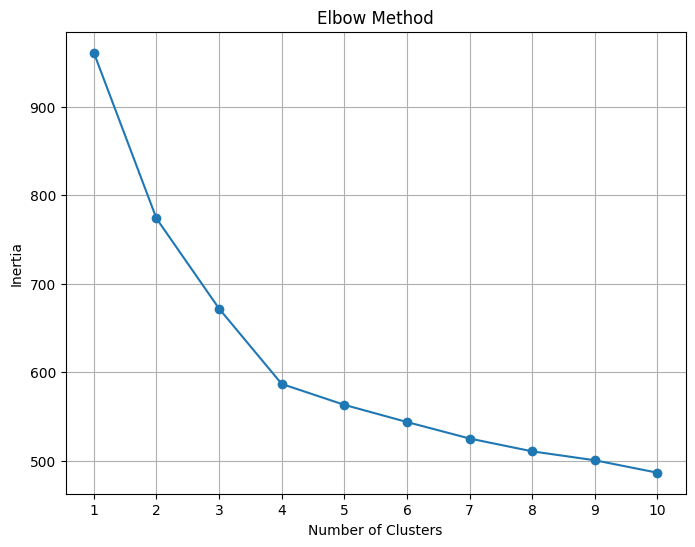

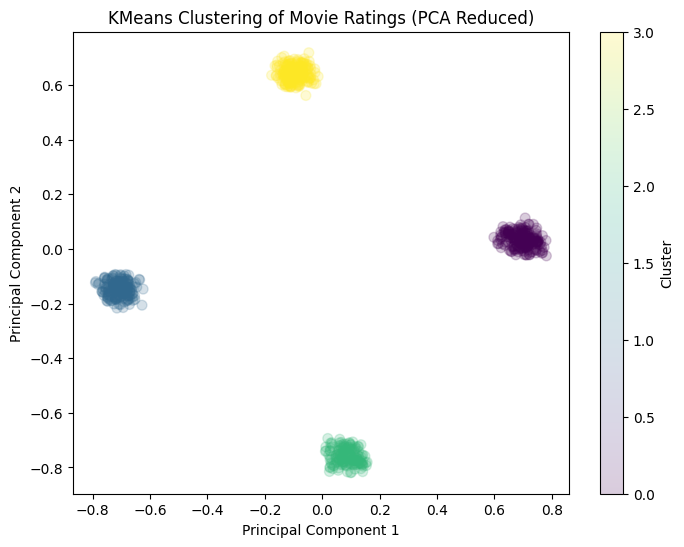

In [ ]:
#Kmeans with PCA and elbow method
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Assuming the elbow method suggests 4 clusters (based on the previous attempt)
# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X_train_scaled)
clusters = kmeans.predict(X_train_scaled)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', s=50, alpha=0.2)
plt.title('KMeans Clustering of Movie Ratings (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# Accuracy for KNN (with and without scaling)

#Turning scaled arrays of X_train,X_test back into  dataframe as for test it needs dataframe values
x1 = pd.DataFrame(X_train_scaled, columns=X_train.columns)
x2 = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print(f"KNN Test accuracy with Min_max scale: {knn.score(x2,y_test)*100:.2f}%")
print(f"KNN Test accuracy without scale: {knn.score(X_test,y_test)*100:.2f}%")
print(knn.score(X_test_scaled,y_test))

# Accuracy for Decision Tree (with and without scaling)
print(f'Decision Tree Test accuracy without scaling: {a*100:.2f}%')
print(f'Decision Tree Test accuracy with scaling: {b*100:.2f}%')

# Test error for the Neural Network
NN.fit(X_train_scaled,y_train)
print(f'Neural Network accuracy without scaling: {NN.score(x2,y_test)*100:.2f}%')
print(f'Neural Network Test accuracy with scaling: {NN.score(X_test,y_test)*100:.2f}%')

KNN Test accuracy with Min_max scale: 29.19%
KNN Test accuracy without scale: 26.71%
0.2919254658385093
Decision Tree Test accuracy without scaling: 24.22%
Decision Tree Test accuracy with scaling: 24.84%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Neural Network accuracy without scaling: 21.74%
Neural Network Test accuracy with scaling: 22.98%


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


#Model Selection

#Bar Chart

In [ ]:

accuracies={}

acc_key=['KNN','Neural Network','Decision Tree']


x1=pd.DataFrame(X_train_scaled,columns=X_train.columns)
x2=pd.DataFrame(X_test_scaled,columns=X_test.columns)

knn.fit(x1,y_train)
NN.fit(x1,y_train)

acc_value=[knn.score(x2,y_test)*100,NN.score(x2,y_test)*100,a*100]

print(acc_value)

for i in range(3):
  accuracies[acc_key[i]]=acc_value[i]

[25.465838509316768, 21.73913043478261, 24.22360248447205]


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


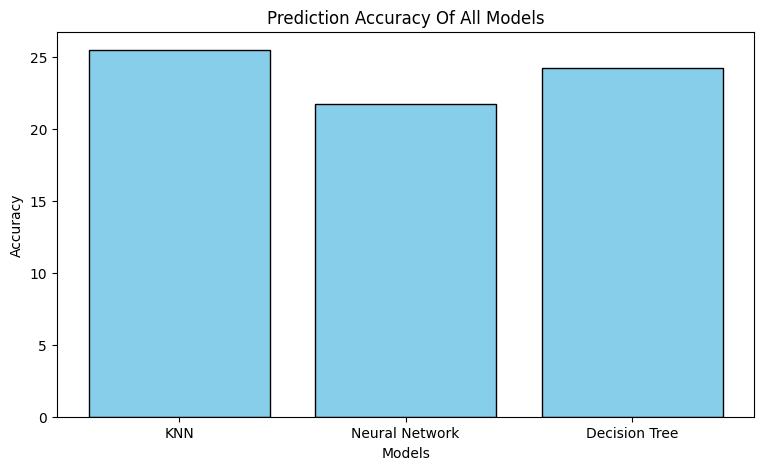

In [ ]:
#accuracies

plt.figure(figsize=(9,5))
plt.bar(accuracies.keys(),accuracies.values(),color='skyblue',edgecolor='black')
plt.title('Prediction Accuracy Of All Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

#Precision,Recall Comparison

In [ ]:
from sklearn.metrics import classification_report

y_pred_knn=knn.predict(x2)

print(f'Precision and Recall for KNN Model: \n\n{classification_report(y_test,y_pred_knn)}')

#Normal model.predict(Neural_x_test won't work because X is multiclass/label as there are multiple columns while y is single class that's why with np.argmax model.predict result is turned into single class)

y_pred_NN = NN.predict(x2)


print(f'Precision and Recall for Neural Network Model: \n\n{classification_report(y_test,y_pred_NN, zero_division=0)}')

dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)

print(f'Precision and Recall for Decision Tree Model: \n\n{classification_report(y_test,y_pred_dt,zero_division=0)}')


Precision and Recall for KNN Model: 

              precision    recall  f1-score   support

           0       0.22      0.28      0.25        74
           1       0.21      0.28      0.24        79
           2       0.32      0.27      0.29        94
           3       0.33      0.19      0.24        75

    accuracy                           0.25       322
   macro avg       0.27      0.25      0.25       322
weighted avg       0.27      0.25      0.26       322

Precision and Recall for Neural Network Model: 

              precision    recall  f1-score   support

           0       0.24      0.23      0.24        74
           1       0.22      0.27      0.24        79
           2       0.22      0.19      0.21        94
           3       0.18      0.19      0.18        75

    accuracy                           0.22       322
   macro avg       0.22      0.22      0.22       322
weighted avg       0.22      0.22      0.22       322

Precision and Recall for Decision Tree Mode

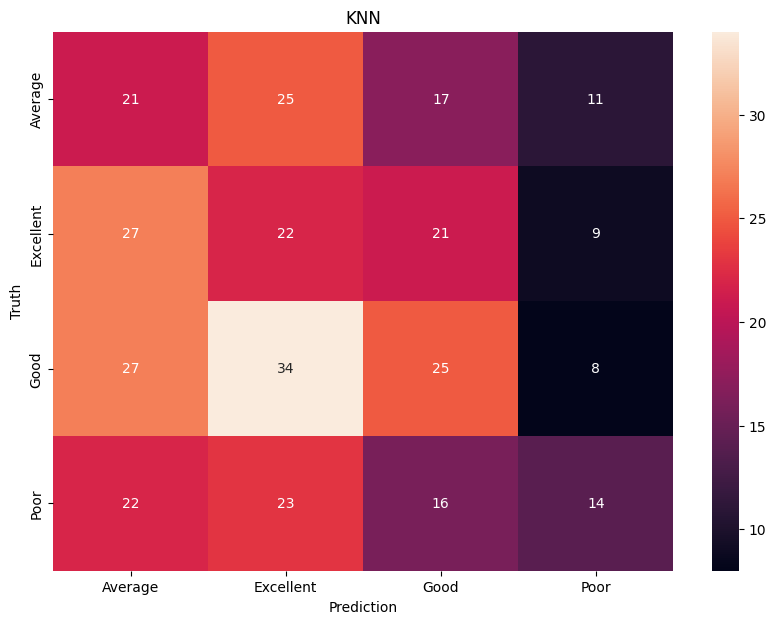

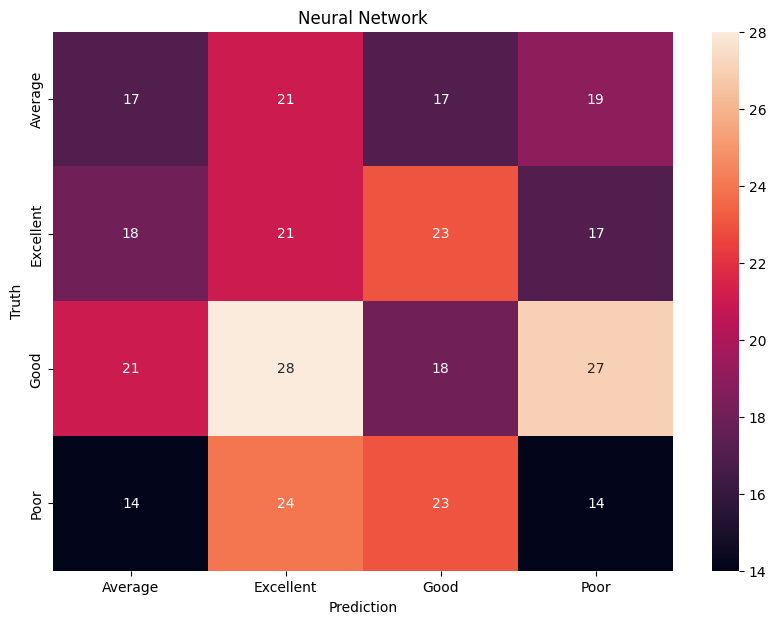

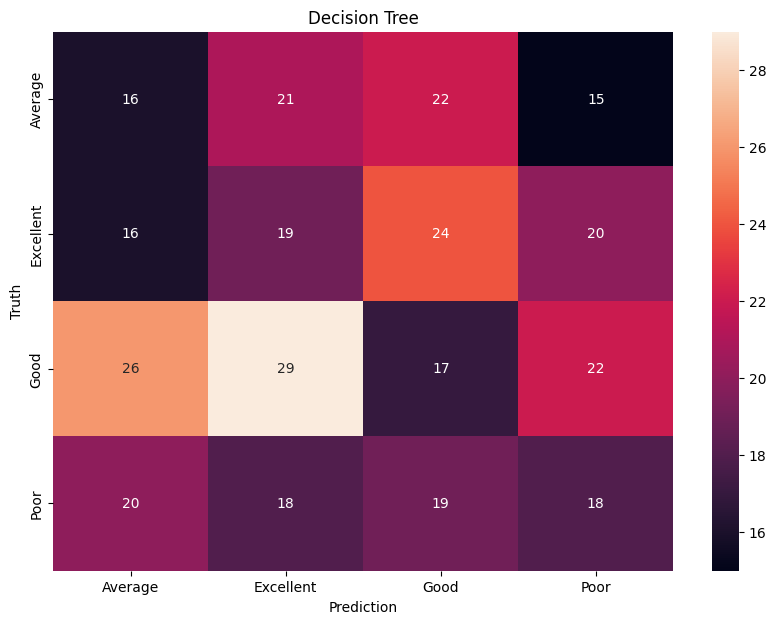

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def print_confusion_matrix(confusion_matrix,class_names,title):
  df_cm=pd.DataFrame(confusion_matrix,index=class_names,columns=class_names)

  fig = plt.figure(figsize=(10,7))

  try:
    heatmap = sns.heatmap(df_cm, annot=True,fmt="d")
  except ValueError:
    raise ValueError("Confusion Matrix values must be integers.")


  plt.title(title)
  plt.ylabel('Truth')
  plt.xlabel('Prediction')

cm1=confusion_matrix(y_test,y_pred_knn)
cm2=confusion_matrix(y_test,y_pred_NN)
cm3=confusion_matrix(y_test,y_pred_dt)

print_confusion_matrix(cm1,['Average','Excellent','Good','Poor'],'KNN')
print_confusion_matrix(cm2,['Average','Excellent','Good','Poor'],'Neural Network')
print_confusion_matrix(cm3,['Average','Excellent','Good','Poor'],'Decision Tree')



#ROC-AUC

In [ ]:
knn.fit(X_train,y_train)
NN.fit(X_train,y_train)
dt.fit(X_train,y_train)

unique = ((len(np.unique(y_test))))
worst_probs = np.zeros((unique,len(y_test)))

knn_probs = knn.predict_proba(X_test)
NN_probs = NN.predict_proba(X_test)
dt_probs = dt.predict_proba(X_test)

#knn_probs = knn_probs[:,1]
#NN_probs = NN_probs[:,1]
#dt_probs = dt_probs[:,1]
knn_probs

array([[0.2, 0.4, 0. , 0.4],
       [0.2, 0.6, 0. , 0.2],
       [0.2, 0.4, 0. , 0.4],
       ...,
       [0. , 0.6, 0.4, 0. ],
       [0.2, 0.2, 0.4, 0.2],
       [0.6, 0.2, 0. , 0.2]])

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import roc_curve, auc


#worst_auc = roc_auc_score(y_test,worst_probs,multi_class='ovr')
knn_auc = roc_auc_score(y_test,knn_probs,multi_class='ovr')
NN_auc = roc_auc_score(y_test,NN_probs,multi_class='ovr')
dt_auc = roc_auc_score(y_test,dt_probs,multi_class='ovr')

print(f'AUC score for KNN: {knn_auc}')
print(f'AUC score for Neural Network: {NN_auc}')
print(f'AUC score for Decision Tree: {dt_auc}')


AUC score for KNN: 0.5257112850919435
AUC score for Neural Network: 0.4909674442768298
AUC score for Decision Tree: 0.4822975194867416


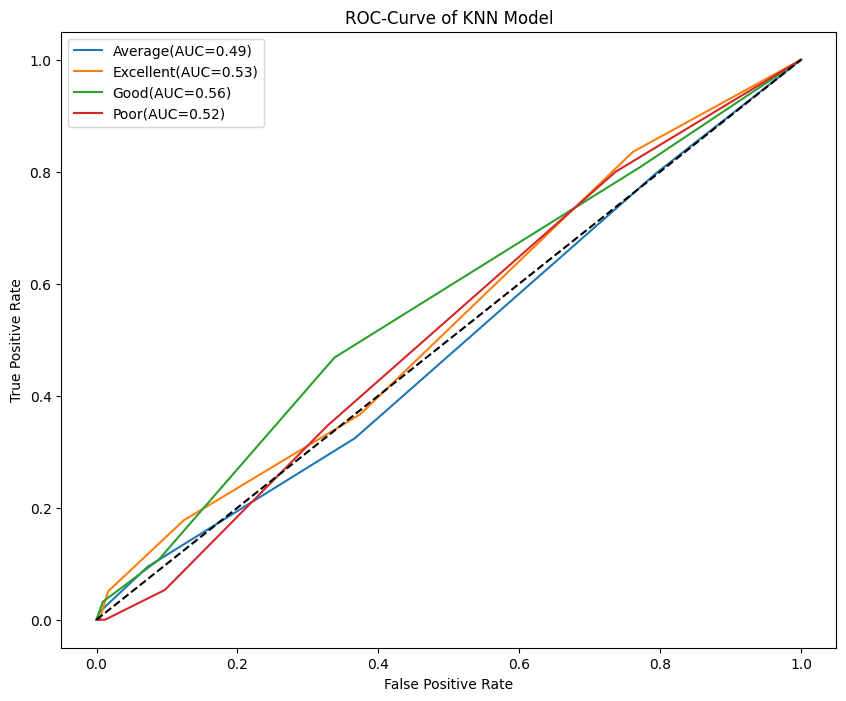

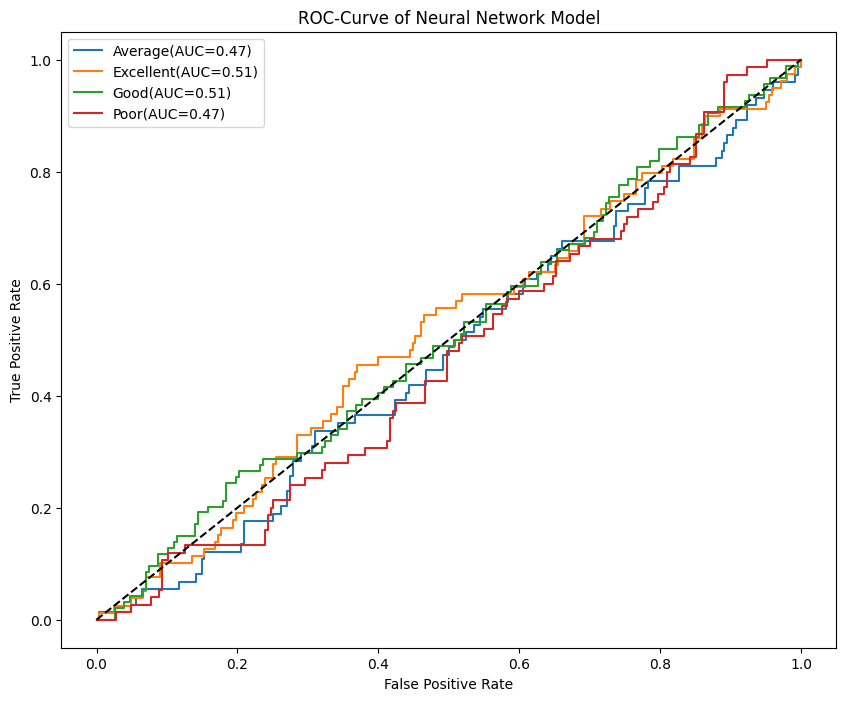

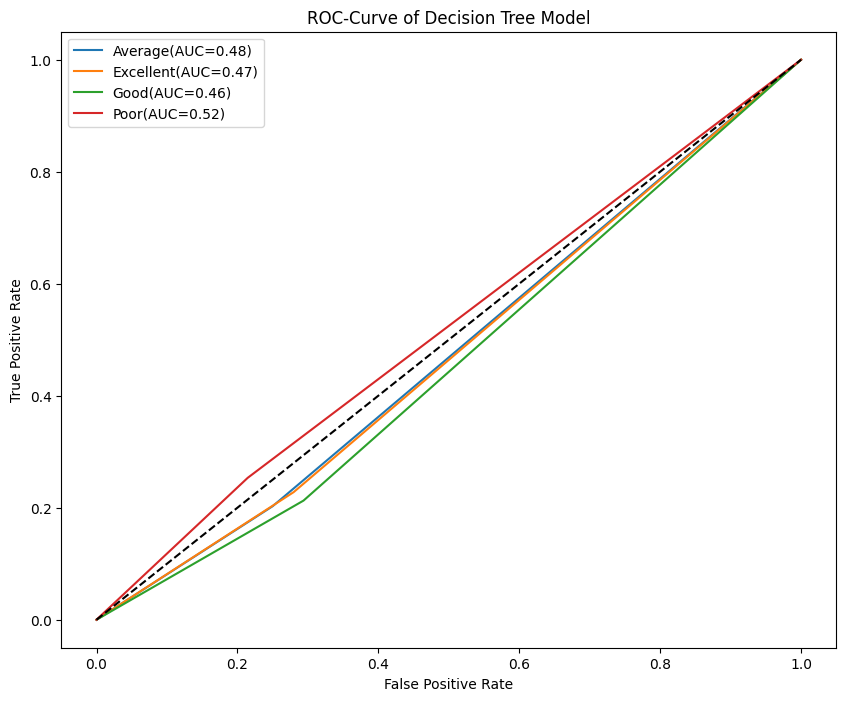

In [ ]:
from sklearn.preprocessing import label_binarize

class_names=enc.classes_
classes=np.unique(y_test)
y_label_test = label_binarize(y_test,classes=classes)

#plt.figure(figsize=(10,8))
models = {'KNN': knn_probs, 'Neural Network': NN_probs, 'Decision Tree': dt_probs}

for name,prob in models.items():
  plt.figure(figsize=(10,8))

  roc_auc = {}

  for i,cls in enumerate(classes):
    fpr,tpr,_= roc_curve(y_label_test[:,i],prob[:,i])
    auc_score=auc(fpr,tpr)
    roc_auc[str(cls)]=float(auc_score)
    plt.plot(fpr,tpr,label=f"{class_names[i]}(AUC={auc_score:.2f})")
  #fpr['micro'],tpr['micro'],_=roc_curve(y_label_test.ravel(),prob.ravel())
  #roc_auc['micro'] = auc(fpr['micro'],tpr['micro'])




  plt.plot([0,1],[0,1],'k--')

  plt.title(f'ROC-Curve of {name} Model')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
